In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cal = pd.read_csv("C:\\Users\\Prajwal\\Desktop\\Data Science\\Assignments\\Simple Linear Regression\\calories_consumed.csv")

In [3]:
cal

,Weight,Calories
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500
5,110,1600
6,128,1400
7,62,1900
8,600,2800
9,1100,3900


In [4]:
cal.columns

Index(['Weight', 'Calories'], dtype='object')

In [5]:
from sklearn.linear_model import LinearRegression

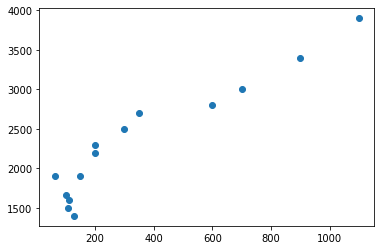

In [6]:
plt.scatter(cal.Weight,cal.Calories)

### Model 1

In [7]:
model1 = LinearRegression()

In [8]:
model1.fit(cal.Calories.values.reshape(-1,1),cal.Weight)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
pred1 = model1.predict(cal.Calories.values.reshape(-1,1))

In [10]:
pred1

array([   4.48259912,  340.60790837,  802.78020858,  298.59224471,
        424.63923568,   46.49826278,  -37.53306453,  172.54525375,
        550.68622665, 1012.85852686,   75.90922734,  172.54525375,
        508.67056299,  634.71755396])

In [11]:
model1.score(cal.Calories.values.reshape(-1,1),cal.Weight)

0.8967919708530552

In [12]:
rmse1 = np.sqrt(np.mean((pred1-cal.Weight)**2))

In [13]:
rmse1

103.30250194726933

In [14]:
model1.coef_

array([0.42015664])

In [15]:
model1.intercept_

-625.7523557163211

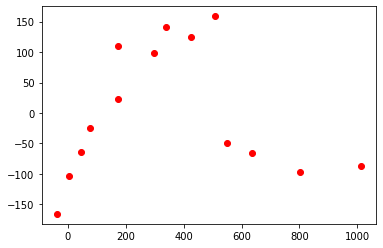

In [16]:
#### Residuals Vs Fitted values
plt.scatter(pred1,(pred1-cal.Weight),c="r")

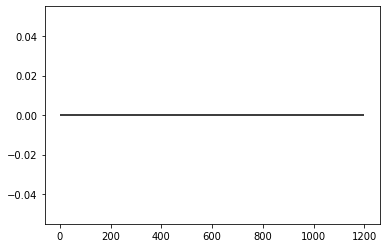

In [17]:
plt.hlines(y=0,xmin=0,xmax=1200) 

In [18]:
### Fitting Quadratic Regression 
cal["Calories_sqrd"] = cal.Calories*cal.Calories

### Model 2

In [19]:
model2 = LinearRegression()

In [20]:
model2.fit(X = cal.iloc[:,[0,2]],y=cal.Weight)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
pred2 = model2.predict(cal.iloc[:,[0,2]])

In [22]:
# Adjusted R-Squared value
model2.score(cal.iloc[:,[0,2]],cal.Weight)

1.0

In [23]:
rmse2 = np.sqrt(np.mean((pred2-cal.Weight)**2))

In [24]:
rmse2

1.8638328680429639e-13

In [25]:
model2.coef_

array([1.00000000e+00, 3.34795708e-20])

In [26]:
model2.intercept_

-2.8421709430404007e-13

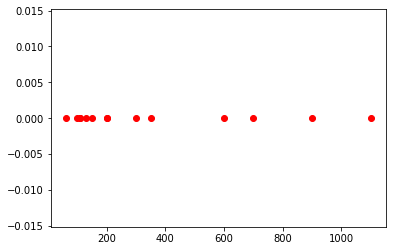

In [27]:
#### Residuals Vs Fitted values
plt.scatter(pred2,(pred2-cal.Weight),c="r")

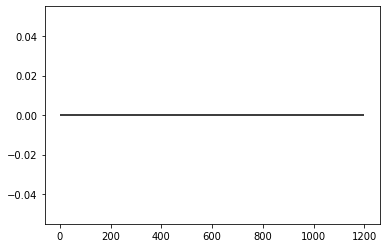

In [28]:
plt.hlines(y=0,xmin=0,xmax=1200)  

(array([6., 0., 2., 3., 0., 0., 2., 0., 0., 1.]),
 array([-1.98951966e-13, -1.33582034e-13, -6.82121026e-14, -2.84217094e-15,
         6.25277607e-14,  1.27897692e-13,  1.93267624e-13,  2.58637556e-13,
         3.24007488e-13,  3.89377419e-13,  4.54747351e-13]),
 <a list of 10 Patch objects>)

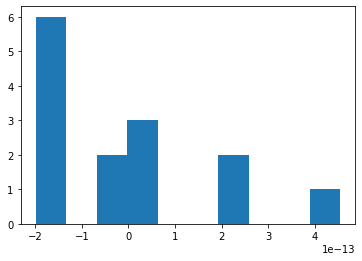

In [29]:
# Checking normal distribution
plt.hist(pred2-cal.Weight)

In [30]:
import pylab
import scipy.stats as st

((array([-1.66151682, -1.18948235, -0.88997893, -0.65463235, -0.45108016,
         -0.2648058 , -0.08735875,  0.08735875,  0.2648058 ,  0.45108016,
          0.65463235,  0.88997893,  1.18948235,  1.66151682]),
  array([-1.98951966e-13, -1.84741111e-13, -1.70530257e-13, -1.56319402e-13,
         -1.49213975e-13, -1.42108547e-13, -5.68434189e-14, -5.68434189e-14,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.27373675e-13,
          2.27373675e-13,  4.54747351e-13])),
 (1.8826883652547012e-13, -1.4718385240744934e-14, 0.9125428179516197))

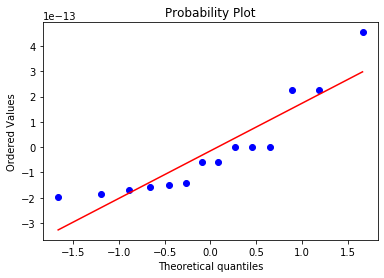

In [31]:
st.probplot(pred2-cal.Weight,dist="norm",plot=pylab)

In [32]:
# Let us prepare a model by applying transformation on dependent variable
cal["Weight_sqrt"] = np.sqrt(cal.Weight)

### Model 3

In [33]:
model3 = LinearRegression()
model3.fit(X = cal.iloc[:,[0,2]],y=cal.Weight_sqrt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
pred3 = model3.predict(cal.iloc[:,[0,2]])

In [35]:
pred3

array([11.0472618 , 13.50004182, 30.25581833, 13.44915309, 15.900994  ,
       11.12816627, 11.47294475, 10.14655965, 22.95796951, 35.25336157,
       10.92481271, 12.16386245, 17.16479828, 25.3815389 ])

In [36]:
# Adjusted R-Squared value
model3.score(cal.iloc[:,[0,2]],cal.Weight_sqrt)

0.9768193691288045

In [37]:
rmse3 = np.sqrt(np.mean(((pred3)**2-cal.Weight)**2))

In [38]:
rmse3

51.74617262852771

In [39]:
model3.coef_

array([2.29238956e-02, 1.13086063e-07])

In [40]:
model3.intercept_

8.317037432292496

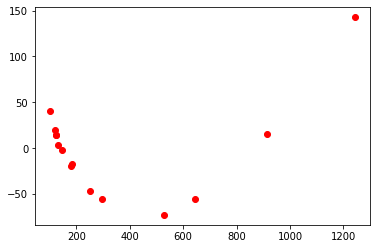

In [41]:
#### Residuals Vs Fitted values
plt.scatter((pred3)**2,((pred3)**2-cal.Weight),c="r")

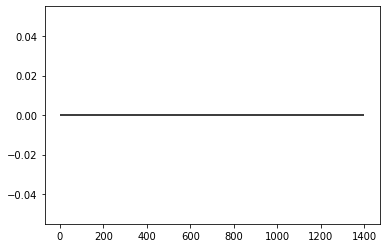

In [42]:
plt.hlines(y=0,xmin=0,xmax=1400)  

(array([3., 1., 2., 2., 4., 1., 0., 0., 0., 1.]),
 array([-72.93163616, -51.35852231, -29.78540847,  -8.21229463,
         13.36081921,  34.93393305,  56.50704689,  78.08016073,
         99.65327457, 121.22638841, 142.79950225]),
 <a list of 10 Patch objects>)

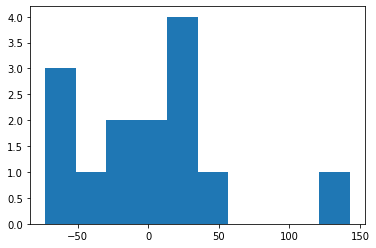

In [43]:
# checking normal distribution for residuals 
plt.hist((pred3)**2-cal.Weight)

((array([-1.66151682, -1.18948235, -0.88997893, -0.65463235, -0.45108016,
         -0.2648058 , -0.08735875,  0.08735875,  0.2648058 ,  0.45108016,
          0.65463235,  0.88997893,  1.18948235,  1.66151682]),
  array([-72.93163616, -55.77748328, -55.3697    , -47.15838993,
         -19.12028114, -17.74887088,  -2.04045018,   3.6284612 ,
          13.83608444,  14.04199318,  15.41454284,  19.35153275,
          40.95267263, 142.79950225])),
 (53.26264902057679, -1.4372873037390872, 0.9273326028848399))

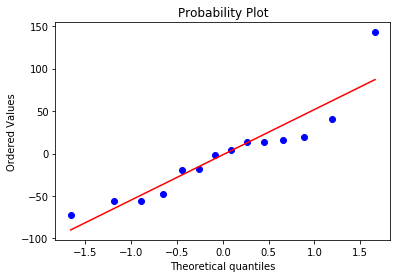

In [44]:
st.probplot((pred3)**2-cal.Weight,dist="norm",plot=pylab)

### Model 4

In [45]:
# Let us prepare a model by applying transformation on dependent variable without transformation on input variables 
model4 = LinearRegression()

In [46]:
model4.fit(X = cal.Calories.values.reshape(-1,1),y=cal.Weight_sqrt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
pred4 = model4.predict(cal.Calories.values.reshape(-1,1))

In [48]:
pred4

array([ 8.46421312, 16.77335837, 28.19843309, 15.73471521, 18.85064468,
        9.50285627,  7.42556996, 12.61878574, 21.96657415, 33.39164887,
       10.22990648, 12.61878574, 20.92793099, 24.04386046])

In [49]:
# Adjusted R-Squared value
model4.score(cal.Calories.values.reshape(-1,1),cal.Weight_sqrt)

0.9138856136581514

In [50]:
rmse4 = np.sqrt(np.mean(((pred4)**2-cal.Weight)**2))

In [51]:
rmse4

73.74642896734412

In [52]:
model4.coef_

array([0.01038643])

In [53]:
model4.intercept_

-7.115434229014134

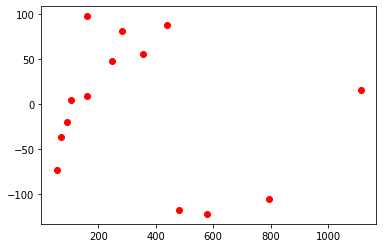

In [54]:
#### Residuals Vs Fitted values
plt.scatter((pred4)**2,((pred4)**2-cal.Weight),c="r")

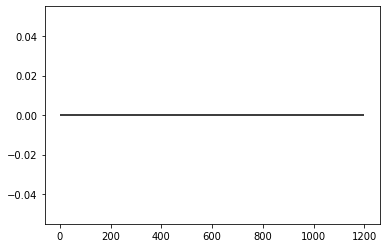

In [55]:
plt.hlines(y=0,xmin=0,xmax=1200)  

((array([-1.66151682, -1.18948235, -0.88997893, -0.65463235, -0.45108016,
         -0.2648058 , -0.08735875,  0.08735875,  0.2648058 ,  0.45108016,
          0.65463235,  0.88997893,  1.18948235,  1.66151682]),
  array([-121.89277418, -117.46962023, -104.84837154,  -72.86091078,
          -36.35709634,  -19.69572268,    4.65098661,    9.23375357,
           15.00221403,   47.58126273,   55.34680479,   81.34555087,
           87.97829557,   97.23375357])),
 (79.75110299379719, -5.339419571718027, 0.9764733939417767))

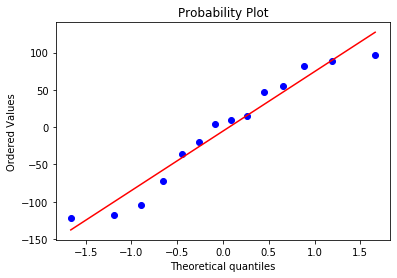

In [56]:
st.probplot((pred4)**2-cal.Weight,dist="norm",plot=pylab)

(array([3., 0., 1., 1., 1., 2., 1., 1., 1., 3.]),
 array([-121.89277418,  -99.98012141,  -78.06746863,  -56.15481586,
         -34.24216308,  -12.32951031,    9.58314247,   31.49579524,
          53.40844802,   75.32110079,   97.23375357]),
 <a list of 10 Patch objects>)

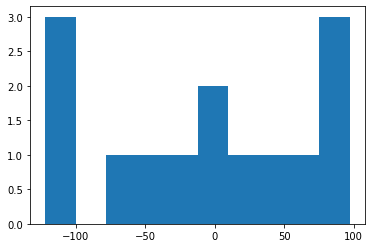

In [57]:
# Checking normal distribution for residuals 
plt.hist((pred4)**2-cal.Weight)

### Model 2 has better R-Squared value